In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("gender_classification_v7.csv")
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
data=pd.DataFrame(data)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
data["gender"].value_counts()
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [5]:
f=data[data.gender=="Female"]
m=data[data.gender=="Male"]

data.gender=[1 if each=="Male" else 0 for each in data.gender]


In [6]:
data["gender"].value_counts()

0    2501
1    2500
Name: gender, dtype: int64

In [7]:
x=data.drop(["gender"],axis=1)
y=data.gender.values

In [8]:

x=(x-np.min(x))/(np.max(x)-np.min(x))

C:\Users\vaish\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\vaish\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
"""# Logistic Regression"""
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)

print("test accuracy: {} ".format(lr.fit(x_train, y_train).score(x_test, y_test)))
print("train accuracy: {} ".format(lr.fit(x_train, y_train).score(x_train, y_train)))

test accuracy: 0.961038961038961 
train accuracy: 0.97025 


In [12]:
y_pred=lr.predict(x_test)
y_true=y_test

In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm


array([[485,  17],
       [ 22, 477]], dtype=int64)

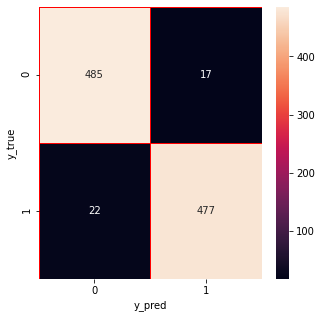

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()



In [15]:
"""# Naive Bayes"""
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train,y_train)

prediction=nb.predict(x_test)
print("Score: ",nb.score(x_test,y_test))


Score:  0.964035964035964


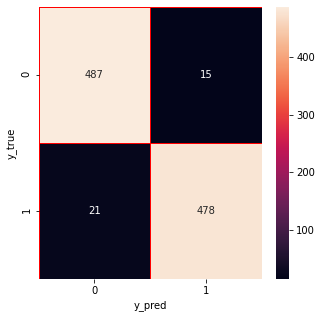

In [16]:
y_pred=nb.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
